In [40]:
%pip install pydub
%pip install sounddevice
!apt-get install -y libportaudio2
%pip install seaborn matplotlib
%pip install matplotlib
%pip install lazy-import
%pip install librosa resampy
%pip install lazy
%pip install tensorflow
%pip install Pygame

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [41]:
import os
import glob
import librosa
import resampy
import tkinter as tk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers import TimeDistributed 
import tkinter as tk
from tkinter import filedialog
from pydub import AudioSegment
import sounddevice as sd
from PIL import Image, ImageTk 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pygame
from pygame import mixer

pygame 2.2.0 (SDL 2.0.22, Python 3.9.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [42]:
def lazy_import(module_name):
    import importlib
    return importlib.import_module(module_name)

# Example usage
resampy = lazy_import("resampy")


In [43]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    features = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).T, axis=0)
    return features

data = []
labels = []
for folder_name in os.listdir('I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data'):
    folder_path = os.path.join('I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data', folder_name)
    for file_path in glob.glob(os.path.join(folder_path, '*.wav')):
        print(file_path)
        features = extract_features(file_path)
        data.append(features)
        labels.append(folder_name)

I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav
I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_beg_angry.wav
I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bite_angry.wav
I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_boat_angry.wav
I:/My Programs/Pro

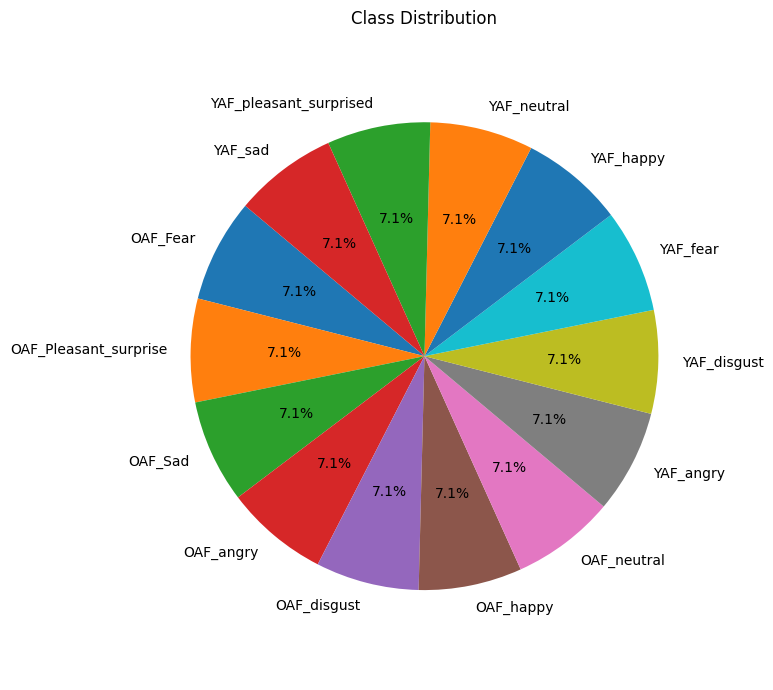

In [44]:
# Plot a pie chart of class distribution with increased size
plt.subplot(1, 3, 3)
# Example code snippet

class_counts = np.bincount(labels_encoded)
class_labels = label_encoder.classes_
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')

# Increase the size of the pie chart
plt.gcf().set_size_inches(20, 7)

# Ensure the pie chart maintains a circular shape
plt.axis('equal')

plt.tight_layout()
plt.show()

In [45]:
# Encode class labels using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

# Expand dimensions to match the expected input shape for LSTM
X_train = np.array(X_train)[:, np.newaxis, :]
X_test = np.array(X_test)[:, np.newaxis, :]

# Get the number of training and testing samples
num_training_samples = X_train.shape[0]
num_testing_samples = X_test.shape[0]

# Build and compile the model
model = Sequential()
model.add(TimeDistributed(Dense(256, activation='relu'), input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Evaluate the model on the test set
loss_t, accuracy_t = model.evaluate(X_train, y_train)
print('Training loss:', loss_t)
print('Training accuracy:', accuracy_t)

Epoch 1/50
70/70 [==============================] - 4s 15ms/step - loss: 2.7854 - accuracy: 0.0821 - val_loss: 2.7042 - val_accuracy: 0.0857
Epoch 2/50
70/70 [==============================] - 1s 8ms/step - loss: 2.7169 - accuracy: 0.0714 - val_loss: 2.6118 - val_accuracy: 0.1696
Epoch 3/50
70/70 [==============================] - 1s 9ms/step - loss: 2.6647 - accuracy: 0.0888 - val_loss: 2.6275 - val_accuracy: 0.1179
Epoch 4/50
70/70 [==============================] - 1s 8ms/step - loss: 2.6271 - accuracy: 0.0897 - val_loss: 2.5480 - val_accuracy: 0.1375
Epoch 5/50
70/70 [==============================] - 1s 12ms/step - loss: 2.5935 - accuracy: 0.1094 - val_loss: 2.5253 - val_accuracy: 0.1500
Epoch 6/50
70/70 [==============================] - 1s 10ms/step - loss: 2.5419 - accuracy: 0.1170 - val_loss: 2.3824 - val_accuracy: 0.2232
Epoch 7/50
70/70 [==============================] - 1s 12ms/step - loss: 2.4433 - accuracy: 0.1478 - val_loss: 2.2124 - val_accuracy: 0.2232
Epoch 8/50
70/70

In [46]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Decode integer labels back to original class labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Print the number of training and testing samples
print(f'Number of training samples: {num_training_samples}')
print(f'Number of testing samples: {num_testing_samples}')

18/18 [==============================] - 0s 2ms/step
Classification Report:
                        precision    recall  f1-score   support

              OAF_Fear       0.89      0.98      0.94        52
 OAF_Pleasant_surprise       0.89      0.68      0.77        47
               OAF_Sad       1.00      0.94      0.97        49
             OAF_angry       1.00      1.00      1.00        37
           OAF_disgust       0.89      0.87      0.88        39
             OAF_happy       0.71      0.78      0.74        37
           OAF_neutral       0.83      1.00      0.91        30
             YAF_angry       0.88      0.97      0.92        37
           YAF_disgust       0.95      1.00      0.97        39
              YAF_fear       0.94      0.81      0.87        37
             YAF_happy       1.00      1.00      1.00        40
           YAF_neutral       0.98      0.95      0.96        43
YAF_pleasant_surprised       0.95      0.93      0.94        40
               YAF_sad     

18/18 [==============================] - 0s 2ms/step
Confusion Matrix:
[[51  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 3 32  0  0  2 10  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 34  1  3  0  0  0  0  0  0  0]
 [ 3  3  0  0  2 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0 30  0  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 41  0  1]
 [ 0  0  0  0  0  0  0  1  1  1  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 33]]


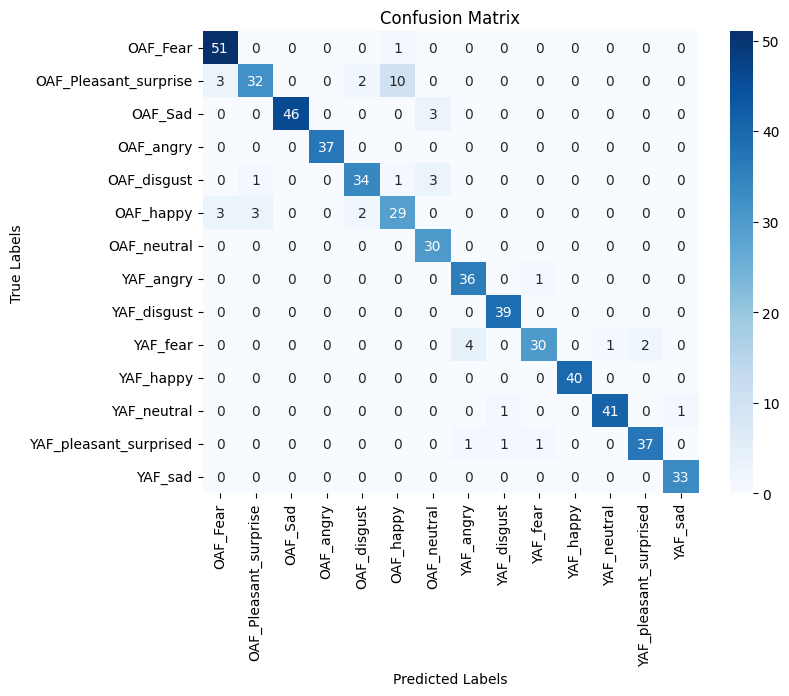

In [47]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Decode integer labels back to original class labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


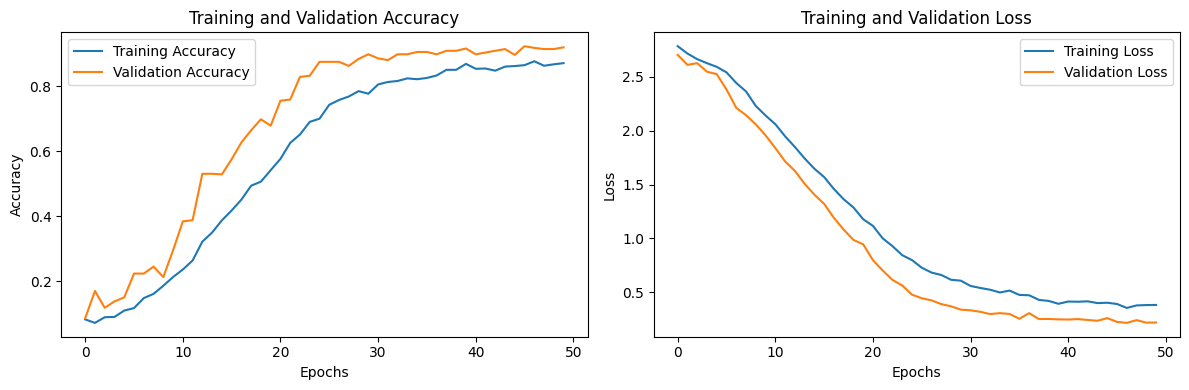

In [48]:
# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
def predict_emotion(audio_file):
    features = extract_features(audio_file)
    features = features[np.newaxis, np.newaxis, :]  
    print("Features shape:", features.shape)
    print("Features:", features)

    predicted_probabilities = model.predict(features)
    print("Predicted probabilities shape:", predicted_probabilities.shape)
    print("Predicted probabilities:", predicted_probabilities)

    predicted_label_index = np.argmax(predicted_probabilities)
    print("Predicted label index:", predicted_label_index)

    predicted_emotion = label_encoder.classes_[predicted_label_index]
    print("Predicted emotion:", predicted_emotion)


    # Emotion mapping for TESS dataset
    emotion_mapping = {
        'YAF_angry': 'ANGRY',
        'YAF_disgust': 'DISGUST',
        'YAF_fear': 'FEAR',
        'YAF_happy': 'HAPPY',
        'YAF_neutral': 'NEUTRAL',
        'YAF_pleasant_surprised': 'SURPRISED',
        'YAF_sad': 'SAD',
        'OAF_angry': 'ANGRY',
        'OAF_disgust': 'DISGUST',
        'OAF_Fear': 'FEAR',
        'OAF_happy': 'HAPPY',
        'OAF_neutral': 'NEUTRAL',
        'OAF_Pleasant_surprised': 'SURPRISED',
        'OAF_Sad': 'SAD',
    }


    recognizable_emotion = emotion_mapping.get(predicted_emotion)
    return recognizable_emotion

In [71]:
class EmotionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Emotion prediction of speech")
        self.root.configure(bg='white')
       
        self.emotion_to_emoji = {
            "HAPPY": "I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/Emotions/happy.png",
            "SAD": "I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/Emotions/sad.png",
            "ANGRY": "I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/Emotions/angry.png",
            "SURPRISED": "I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/Emotions/surprised.png",
            "NEUTRAL": "I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/Emotions/neutral.png",
            "FEAR": "I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/Emotions/fear.png",
            "DISGUST": "I:/My Programs/Project/Capstone(Thesis)/Code & Dataset/Emotions/disgusted.png"
        }
           
        self.emoji_image = None  
        self.prediction_history = []  
        
        self.show_home_page()
        
    def show_home_page(self):
        self.clear_window()
        
        label = tk.Label(self.root, text=" Welcome to Speech Prediction ", font=('Helvetica bold', 16),bg='white')
        label.pack(pady=20)
        
        button = tk.Button(self.root, text="Audio Prediction", command=self.show_audio_page, bg='orange')
        button.pack()
        
        button_history = tk.Button(self.root, text="Prediction History", command=self.show_history_page, bg='yellow')
        button_history.pack(pady=90)
        
    def show_audio_page(self):
        self.clear_window()
        
        canvas = tk.Canvas(self.root, width=300, height=300, bg='white')
        canvas.pack()
        
        label1 = tk.Label(self.root, text='Emotion of speech', font=('Helvetica bold', 15),bg='white')
        canvas.create_window(150, 50, window=label1)
        
        def upload_audio():
            file_path = filedialog.askopenfilename(filetypes=[("Audio Files", "*.wav")])
            if file_path:
                predicted_emotion = predict_emotion(file_path)
                label2.config(text=predicted_emotion)
                
                self.prediction_history.append((os.path.basename(file_path), predicted_emotion))
                
                emoji_image_path = self.emotion_to_emoji.get(predicted_emotion)
                if emoji_image_path:
                    emoji_image = Image.open(emoji_image_path)
                    emoji_image = emoji_image.resize((50, 50), Image.ANTIALIAS)
                    self.emoji_image = ImageTk.PhotoImage(emoji_image)
                    emoji_label.config(image=self.emoji_image)
                
        button1 = tk.Button(self.root, text='Upload Audio', command=upload_audio, bg='lightgreen')
        canvas.create_window(150, 100, window=button1)
        
        label2 = tk.Label(self.root, text='Predicted emotion will be displayed here')
        canvas.create_window(150, 130, window=label2)
        
        emoji_label = tk.Label(self.root, image=None)
        canvas.create_window(150, 180, window=emoji_label)

        back_button = tk.Button(self.root, text="Back to Home", command=self.show_home_page)
        canvas.create_window(150, 250, window=back_button)
        
    def show_history_page(self):
        self.clear_window()
        
        canvas = tk.Canvas(self.root, width=300, height=300, bg='white')
        canvas.pack()
        
        label = tk.Label(self.root, text="Prediction History", font=('Helvetica bold', 16),bg='white')
        canvas.create_window(150, 50, window=label)
        
        if self.prediction_history:
            for index, (file_name, predicted_emotion) in enumerate(self.prediction_history, start=1):
                history_text = f"{index}. File: {file_name}, Emotion: {predicted_emotion}"
                history_label = tk.Label(self.root, text=history_text)
                canvas.create_window(150, 50 + index * 30, window=history_label)
        else:
            no_history_label = tk.Label(self.root, text="No prediction history available.")
            canvas.create_window(150, 150, window=no_history_label)
        
        back_button = tk.Button(self.root, text="Back to Home", command=self.show_home_page)
        canvas.create_window(150, 250, window=back_button)
        
        
    def clear_window(self):
        for widget in self.root.winfo_children():
            widget.destroy()

if __name__ == "__main__":
    root = tk.Tk()
    app = EmotionApp(root)
    root.mainloop()

Features shape: (1, 1, 13)
Features: [[[-293.00165      56.382294    -35.465813     16.240993    -20.215097
     -4.355639    -12.514782    -15.282689     -0.78891385    0.58589065
    -14.266982     17.118084    -23.716263  ]]]
1/1 [==============================] - 0s 28ms/step
Predicted probabilities shape: (1, 14)
Predicted probabilities: [[1.1452040e-06 2.2659293e-07 2.3684267e-07 2.1511376e-06 7.2382434e-08
  6.7135795e-07 5.3993193e-07 1.3403478e-02 1.9821536e-04 1.9237029e-04
  9.8599142e-01 1.1446778e-04 7.7456469e-05 1.7434162e-05]]
Predicted label index: 10
Predicted emotion: YAF_happy


C:\Users\Windows\AppData\Local\Temp\ipykernel_8772\4149588358.py:54: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  emoji_image = emoji_image.resize((50, 50), Image.ANTIALIAS)
